In [0]:
from zipfile import ZipFile
from random import randint
file_name="/content/ML_Dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()


In [0]:
!pip install pykalman

import pandas as pd
def load(file):
  column_name = ['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21']
  filename="/content/ML_Dataset/"+file
  data = pd.read_table(filename, header=None, delim_whitespace=True)
  data.columns = column_name
  return data
data=load("train_FD001.txt")
temp=pd.DataFrame(data=data,columns=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'])
temp.head()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [0]:
temp.describe()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


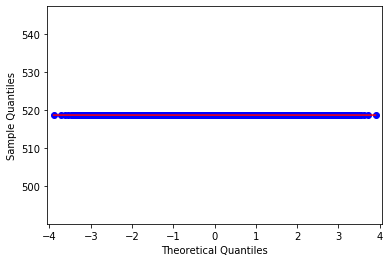

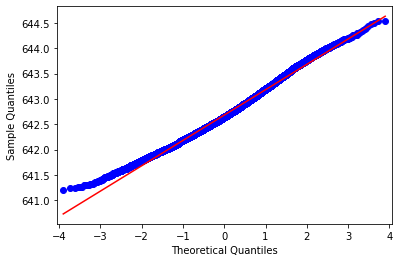

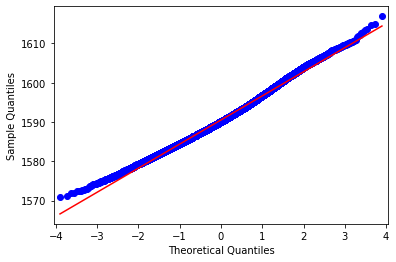

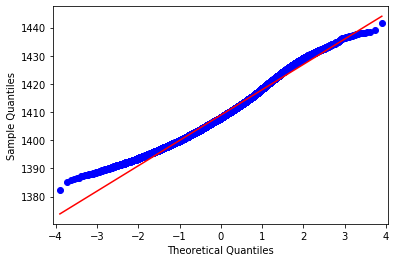

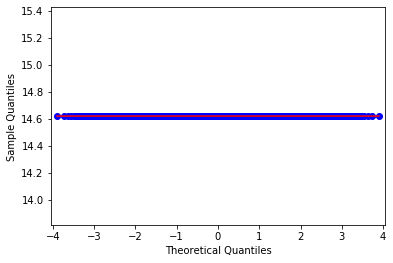

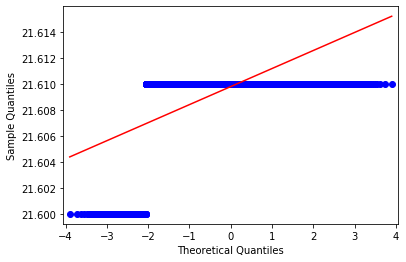

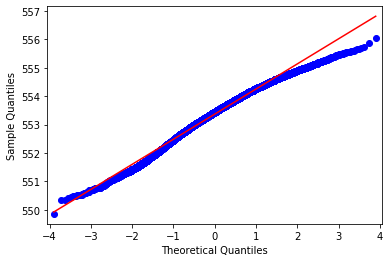

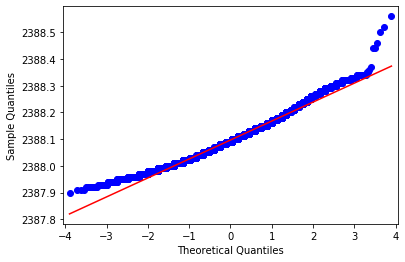

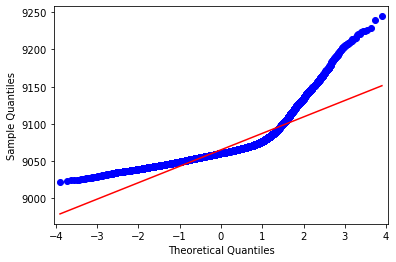

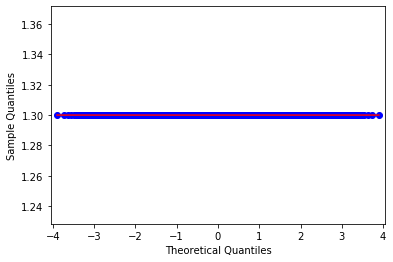

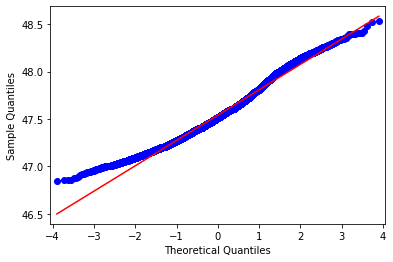

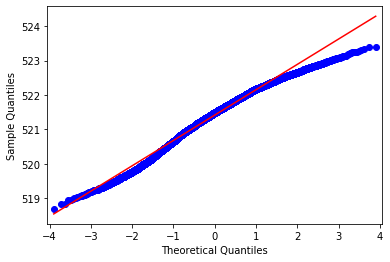

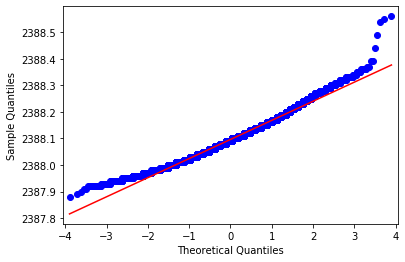

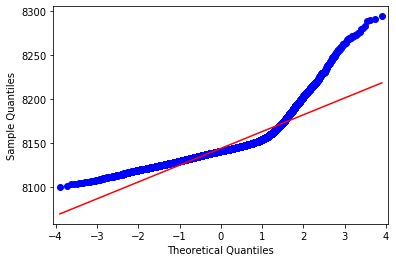

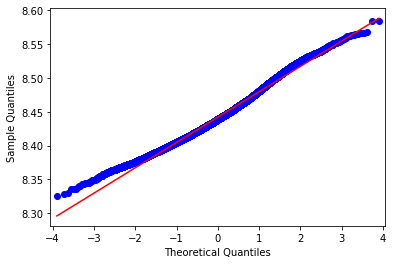

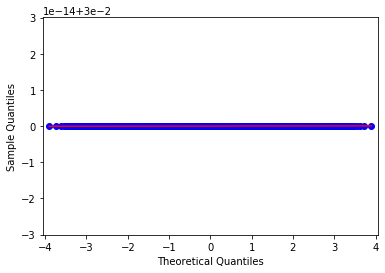

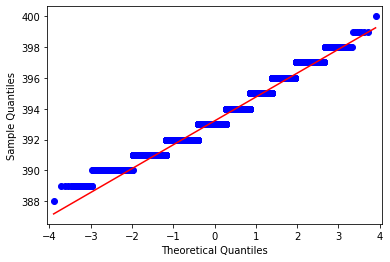

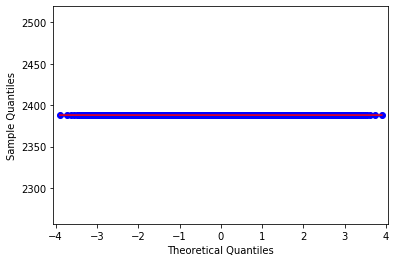

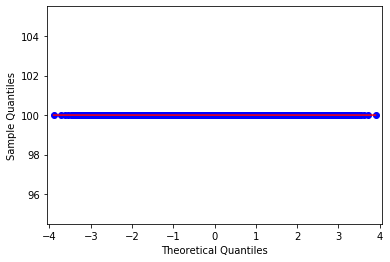

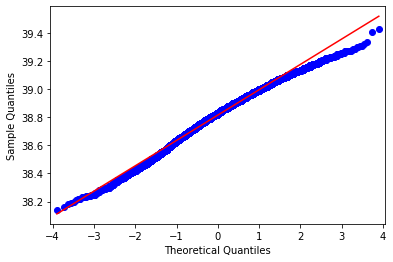

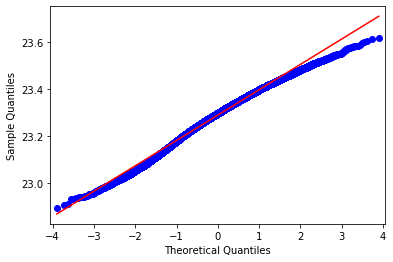

In [0]:
import matplotlib.pyplot as plt
x=pd.DataFrame(data=data[['s1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21']],columns=['s1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'])
from statsmodels.graphics.gofplots import qqplot
for each in x.keys():
    qqplot(x[each],line='s')
    plt.show()

In [0]:
from pykalman import KalmanFilter
for cols in data.columns:
    if cols == 'engine_id' or cols == 'cycle' or cols == 'setting1' or cols == 'setting2' or cols == 'setting3':
        continue;
    if cols == 'cycle':
        continue;
    else:
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = data[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(data[cols].values)
        data[cols] = state_means.flatten()

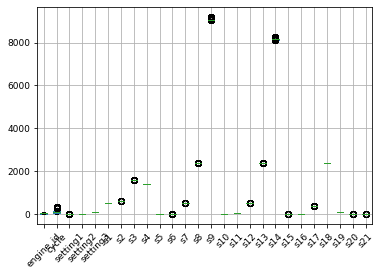

In [0]:
boxplot=temp.boxplot(column=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'],rot=45,fontsize=9)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(copy='true')
scaler.fit(temp)
temp_scaled=pd.DataFrame(data=scaler.transform(temp),columns=temp.columns)

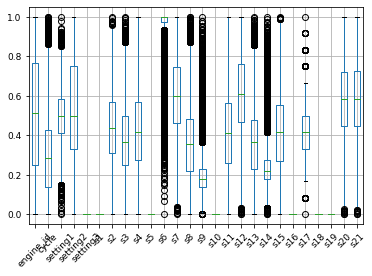

In [0]:
boxplot=temp_scaled.boxplot(column=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15', 's16', 's17', 's18', 's19', 's20', 's21'],rot=45,fontsize=9)

In [0]:
Q1 = temp_scaled.quantile(0.25)
Q3 = temp_scaled.quantile(0.75)
IQR = Q3-Q1

print(temp_scaled.shape)
df_dup = temp_scaled[~((temp_scaled < (Q1 - 1.5 * IQR)) |(temp_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_dup.shape)
# boxplot=df_dup.boxplot(column=['engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
#                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
#                     's15', 's16', 's17', 's18', 's19', 's20', 's21'],rot=45,fontsize=9)
# print(boxplot)


(20631, 26)
(14496, 26)


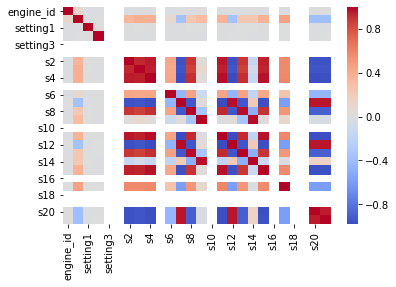

In [0]:
data=df_dup
import seaborn as sns
correlation=data.corr(method ='pearson')
sns.heatmap(correlation, cmap='coolwarm')

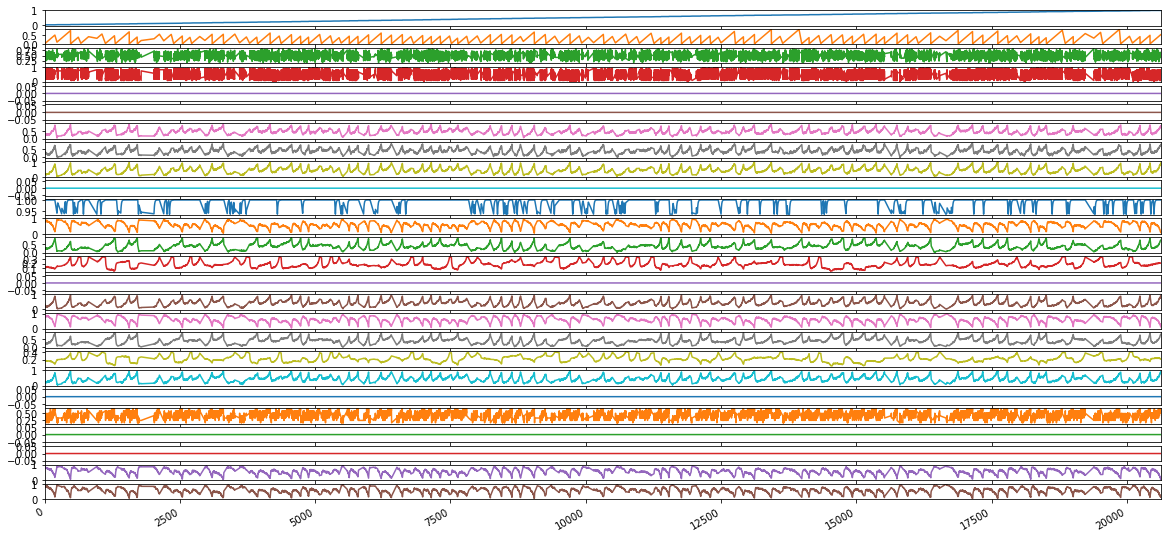

In [0]:
from matplotlib import pyplot
data.plot(subplots=True, legend=False,figsize=(20,10))
pyplot.show()

In [0]:
def new_labels(data, labels):
    ct_ids = []
    ct_times = []
    ct_labels = []
    data = data.copy()
    data['RUL'] = labels
    gb = data.groupby(['engine_id'])
    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        r = randint(5, instances - 1)
        ct_ids.append(engine_no_df[1].iloc[r,:]['engine_id'])
        ct_times.append(engine_no_df[1].iloc[r,:]['time'])
        ct_labels.append(engine_no_df[1].iloc[r,:]['RUL'])
    ct = pd.DataFrame({'engine_id': ct_ids,
                       'cutoff_time': ct_times,
                       'RUL': ct_labels})
    ct = ct[['engine_id', 'cutoff_time', 'RUL']]
    ct.index = ct['engine_id']
    ct.index = ct.index.rename('index')
    return ct,data

def make_cutoff_times(data):
    gb = data.groupby(['engine_id'])
    labels = []
    data['time'] = pd.date_range('1/1/2000', periods=data.shape[0], freq='600s')

    for engine_no_df in gb:
        instances = engine_no_df[1].shape[0]
        label = [instances - i - 1 for i in range(instances)]
        labels += label
    
    return new_labels(data, labels)

In [0]:
cutoff_times ,data= make_cutoff_times(data)

cutoff_times.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,engine_id,cutoff_time,RUL
index,,,
0.000000,0.000000,2000-01-01 13:40:00,102
0.010101,0.010101,2000-01-03 02:20:00,1
0.020202,0.020202,2000-01-03 14:30:00,12
0.030303,0.030303,2000-01-04 00:00:00,86
0.040404,0.040404,2000-01-04 21:20:00,38


# New Section

In [0]:
import featuretools as ft
def make_entityset(data):
    es = ft.EntitySet('Dataset')
    es.entity_from_dataframe(dataframe=data,
                             entity_id='recordings',
                             index='index',
                             time_index='time')

    es.normalize_entity(base_entity_id='recordings', 
                        new_entity_id='engines',
                        index='engine_id')

    es.normalize_entity(base_entity_id='recordings', 
                        new_entity_id='cycles',
                        index='cycle')
    return es
es = make_entityset(data)
es

2020-02-01 08:41:46,642 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column


Entityset: Dataset
  Entities:
    recordings [Rows: 14496, Columns: 29]
    engines [Rows: 100, Columns: 2]
    cycles [Rows: 312, Columns: 2]
  Relationships:
    recordings.engine_id -> engines.engine_id
    recordings.cycle -> cycles.cycle

In [0]:
fm,features = ft.dfs(entityset=es, 
                      target_entity='engines',
                      agg_primitives=['last', 'max', 'min'],
                      trans_primitives=[],
                      cutoff_time=cutoff_times,
                      max_depth=3,
                      verbose=True)
fm.to_csv('simple_fm.csv')

Built 302 features
Elapsed: 00:51 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 10/10 chunks


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

fm = pd.read_csv('simple_fm.csv', index_col='engine_id')
X = fm.copy().fillna(0)
y = X.pop('RUL')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)


In [0]:
def feature_importances(X, reg, feats=5):
    feature_imps = [(imp, X.columns[i]) 
                    for i, imp in enumerate(reg.feature_importances_)]
    feature_imps.sort()
    feature_imps.reverse()
    for i, f in enumerate(feature_imps[0:feats]):
        print('{}: {} [{:.3f}]'.format(i + 1, f[1], f[0]))
    print('-----\n')
    return [f[1] for f in feature_imps[:feats]]

In [0]:
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)
    
preds = reg.predict(X_test)
scores = mean_absolute_error(preds, y_test)
print('Mean Abs Error: {:.2f}'.format(scores))
# high_imp_feats = feature_importances(X, reg, feats=10)

Mean Abs Error: 2.67
1: LAST(recordings.RUL) [0.274]
2: MIN(recordings.cycles.LAST(recordings.RUL)) [0.261]
3: MIN(recordings.RUL) [0.227]
4: LAST(recordings.cycles.LAST(recordings.RUL)) [0.213]
5: LAST(recordings.cycles.MIN(recordings.s15)) [0.001]
6: LAST(recordings.cycles.LAST(recordings.s9)) [0.001]
7: MAX(recordings.cycles.MAX(recordings.s4)) [0.001]
8: MAX(recordings.cycles.MAX(recordings.s3)) [0.001]
9: MIN(recordings.cycles.MIN(recordings.s7)) [0.001]
10: MIN(recordings.cycles.MIN(recordings.s12)) [0.000]
-----



In [0]:
data2 = load('test_FD001.txt')
cutoff_times,data2 = make_cutoff_times(data2)
es2 = make_entityset(data2)
fm2 = ft.calculate_feature_matrix(entityset=es2, features=features,cutoff_time=cutoff_times, verbose=True)
fm2.head()

2020-02-01 09:29:15,057 featuretools.entityset - WARNING    index index not found in dataframe, creating new integer column
Elapsed: 00:54 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 10/10 chunks


,LAST(recordings.cycle),LAST(recordings.setting1),LAST(recordings.setting2),LAST(recordings.setting3),LAST(recordings.s1),LAST(recordings.s2),LAST(recordings.s3),LAST(recordings.s4),LAST(recordings.s5),LAST(recordings.s6),LAST(recordings.s7),LAST(recordings.s8),LAST(recordings.s9),LAST(recordings.s10),LAST(recordings.s11),LAST(recordings.s12),LAST(recordings.s13),LAST(recordings.s14),LAST(recordings.s15),LAST(recordings.s16),LAST(recordings.s17),LAST(recordings.s18),LAST(recordings.s19),LAST(recordings.s20),LAST(recordings.s21),LAST(recordings.RUL),MAX(recordings.setting1),MAX(recordings.setting2),MAX(recordings.setting3),MAX(recordings.s1),MAX(recordings.s2),MAX(recordings.s3),MAX(recordings.s4),MAX(recordings.s5),MAX(recordings.s6),MAX(recordings.s7),MAX(recordings.s8),MAX(recordings.s9),MAX(recordings.s10),MAX(recordings.s11),...,MIN(recordings.cycles.MAX(recordings.s9)),MIN(recordings.cycles.MAX(recordings.s10)),MIN(recordings.cycles.MAX(recordings.s11)),MIN(recordings.cycles.MAX(recordings.s12)),MIN(recordings.cycles.MAX(recordings.s13)),MIN(recordings.cycles.MAX(recordings.s14)),MIN(recordings.cycles.MAX(recordings.s15)),MIN(recordings.cycles.MAX(recordings.s16)),MIN(recordings.cycles.MAX(recordings.s17)),MIN(recordings.cycles.MAX(recordings.s18)),MIN(recordings.cycles.MAX(recordings.s19)),MIN(recordings.cycles.MAX(recordings.s20)),MIN(recordings.cycles.MAX(recordings.s21)),MIN(recordings.cycles.MAX(recordings.RUL)),MIN(recordings.cycles.MIN(recordings.setting1)),MIN(recordings.cycles.MIN(recordings.setting2)),MIN(recordings.cycles.MIN(recordings.setting3)),MIN(recordings.cycles.MIN(recordings.s1)),MIN(recordings.cycles.MIN(recordings.s2)),MIN(recordings.cycles.MIN(recordings.s3)),MIN(recordings.cycles.MIN(recordings.s4)),MIN(recordings.cycles.MIN(recordings.s5)),MIN(recordings.cycles.MIN(recordings.s6)),MIN(recordings.cycles.MIN(recordings.s7)),MIN(recordings.cycles.MIN(recordings.s8)),MIN(recordings.cycles.MIN(recordings.s9)),MIN(recordings.cycles.MIN(recordings.s10)),MIN(recordings.cycles.MIN(recordings.s11)),MIN(recordings.cycles.MIN(recordings.s12)),MIN(recordings.cycles.MIN(recordings.s13)),MIN(recordings.cycles.MIN(recordings.s14)),MIN(recordings.cycles.MIN(recordings.s15)),MIN(recordings.cycles.MIN(recordings.s16)),MIN(recordings.cycles.MIN(recordings.s17)),MIN(recordings.cycles.MIN(recordings.s18)),MIN(recordings.cycles.MIN(recordings.s19)),MIN(recordings.cycles.MIN(recordings.s20)),MIN(recordings.cycles.MIN(recordings.s21)),MIN(recordings.cycles.MIN(recordings.RUL)),RUL
engine_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22,0.0012,0.0001,100.0,518.67,642.45,1582.78,1404.06,14.62,21.61,553.43,2388.00,9046.45,1.3,47.26,521.41,2388.04,8128.89,8.4557,0.03,392,2388,100.0,38.94,23.3770,9,0.0042,0.0003,100.0,518.67,643.02,1593.29,1412.28,14.62,21.61,554.85,2388.10,9056.96,1.3,47.50,...,9041.12,1.3,47.14,521.38,2388.00,8125.55,8.3803,0.03,390,2388,100.0,38.85,23.3224,9,-0.0056,-0.0004,100.0,518.67,641.71,1579.12,1395.13,14.62,21.61,553.43,2388.0,9041.12,1.3,47.14,521.38,2388.00,8125.55,8.3803,0.03,390,2388,100.0,38.85,23.3224,9,9
2,46,0.0026,-0.0002,100.0,518.67,642.84,1589.31,1401.67,14.62,21.61,553.83,2388.11,9045.35,1.3,47.42,521.04,2388.10,8128.82,8.4455,0.03,394,2388,100.0,38.88,23.2310,3,0.0039,0.0005,100.0,518.67,643.33,1599.04,1416.93,14.62,21.61,554.54,2388.17,9055.90,1.3,47.65,...,9042.03,1.3,47.19,520.96,2388.06,8124.10,8.3919,0.03,392,2388,100.0,38.67,23.2196,3,-0.0056,-0.0005,100.0,518.67,641.71,1579.12,1395.09,14.62,21.61,552.55,2388.0,9036.57,1.3,47.05,520.62,2388.00,8120.05,8.3784,0.03,390,2388,100.0,38.67,23.2196,0,3
3,8,0.0033,0.0000,100.0,518.67,642.68,1588.26,1407.24,14.62,21.61,553.56,2388.09,9042.62,1.3,47.50,521.81,2388.08,8131.73,8.4626,0.03,393,2388,100.0,38.83,23.3569,118,0.0039,0.0003,100.0,518.67,642.98,1597.31,1408.39,14.62,21.61,553.74,2388.16,9057.38,1.3,47.71,...,9051.03,1.3,47.50,521.59,2388.08,8131.17,8.4238,0.03,392,2388,100.0,38.91,23.3467,118

In [40]:
X = fm2.copy().fillna(0)
y = X.pop('RUL')
preds2 = reg.predict(X)
print('Mean Abs Error: {:.2f}'.format(mean_absolute_error(preds2, y)))

Mean Abs Error: 3.60


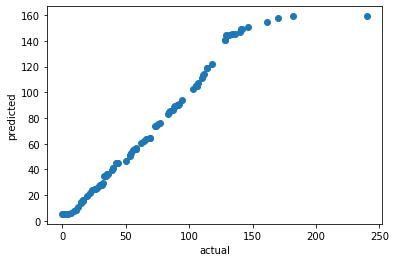

In [42]:
fig,ax = plt.subplots()
ax.scatter(y,preds2)
ax.plot()
ax.set_xlabel("actual")
ax.set_ylabel("predicted")
plt.show()

Bagging


In [0]:
base_cls = DecisionTreeClassifier() 
  
# no. of base classifier 
num_trees = 500
  
# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 
  
results = model_selection.cross_val_score(model, X, Y, cv = kfold) 
print("accuracy :") 
print(results.mean()) 

Boosting

In [0]:
import xgboost as xgb 
my_model = xgb.XGBClassifier() 
my_model.fit(X_train, y_train) 
   
# Predicting the Test set results 
y_pred = my_model.predict(X_test) 
   
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 

In [0]:

from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)